<a href="https://colab.research.google.com/github/sakeefmahmud/Graduate-Student-Employability-Prediction/blob/main/CollegePlacement.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
from google.colab import drive
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier

from sklearn.metrics import mean_squared_error, r2_score, classification_report, confusion_matrix, accuracy_score

import joblib
drive.mount('/content/drive')
file='/content/drive/My Drive/Colab Notebooks/Datasets/CollegePlacement.csv'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [19]:
df=pd.read_csv(file)
df.shape

(10000, 10)

In [20]:
df

,College_ID,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Internship_Experience,Extra_Curricular_Score,Communication_Skills,Projects_Completed,Placement
0,CLG0030,107,6.61,6.28,8,No,8,8,4,No
1,CLG0061,97,5.52,5.37,8,No,7,8,0,No
2,CLG0036,109,5.36,5.83,9,No,3,1,1,No
3,CLG0055,122,5.47,5.75,6,Yes,1,6,1,No
4,CLG0004,96,7.91,7.69,7,No,8,10,2,No
...,...,...,...,...,...,...,...,...,...,...
9995,CLG0021,119,8.41,8.29,4,No,1,8,0,Yes
9996,CLG0098,70,9.25,9.34,7,No,0,7,2,No
9997,CLG0066,89,6.08,6.25,3,Yes,3,9,5,No
9998,CLG0045,107,8.77,8.92,3,No,7,5,1,No


In [21]:
df.describe()

,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Extra_Curricular_Score,Communication_Skills,Projects_Completed
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,99.471800,7.535673,7.532379,5.546400,4.970900,5.561800,2.513400
std,15.053101,1.447519,1.470141,2.873477,3.160103,2.900866,1.715959
min,41.000000,5.000000,4.540000,1.000000,0.000000,1.000000,0.000000
25%,89.000000,6.290000,6.290000,3.000000,2.000000,3.000000,1.000000
50%,99.000000,7.560000,7.550000,6.000000,5.000000,6.000000,3.000000
75%,110.000000,8.790000,8.770000,8.000000,8.000000,8.000000,4.000000
max,158.000000,10.000000,10.460000,10.000000,10.000000,10.000000,5.000000


In [22]:
df['Placement'].value_counts()


,count
Placement,
No,8341
Yes,1659


In [7]:
df.dtypes

,0
College_ID,object
IQ,int64
Prev_Sem_Result,float64
CGPA,float64
Academic_Performance,int64
Internship_Experience,object
Extra_Curricular_Score,int64
Communication_Skills,int64
Projects_Completed,int64
Placement,object


In [11]:
df.isnull().sum()

,0
College_ID,0
IQ,0
Prev_Sem_Result,0
CGPA,0
Academic_Performance,0
Internship_Experience,0
Extra_Curricular_Score,0
Communication_Skills,0
Projects_Completed,0
Placement,0


In [23]:
df['Internship_Experience']=df['Internship_Experience'].map({'Yes':1,'No':0}).astype(int)

In [24]:
df.head()

,College_ID,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Internship_Experience,Extra_Curricular_Score,Communication_Skills,Projects_Completed,Placement
0,CLG0030,107,6.61,6.28,8,0,8,8,4,No
1,CLG0061,97,5.52,5.37,8,0,7,8,0,No
2,CLG0036,109,5.36,5.83,9,0,3,1,1,No
3,CLG0055,122,5.47,5.75,6,1,1,6,1,No
4,CLG0004,96,7.91,7.69,7,0,8,10,2,No


In [25]:
df['Placement']=df['Placement'].map({'Yes':1,'No':0}).astype(int)

In [26]:
df.head()

,College_ID,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Internship_Experience,Extra_Curricular_Score,Communication_Skills,Projects_Completed,Placement
0,CLG0030,107,6.61,6.28,8,0,8,8,4,0
1,CLG0061,97,5.52,5.37,8,0,7,8,0,0
2,CLG0036,109,5.36,5.83,9,0,3,1,1,0
3,CLG0055,122,5.47,5.75,6,1,1,6,1,0
4,CLG0004,96,7.91,7.69,7,0,8,10,2,0


In [27]:
df=df.drop(columns=['College_ID'])

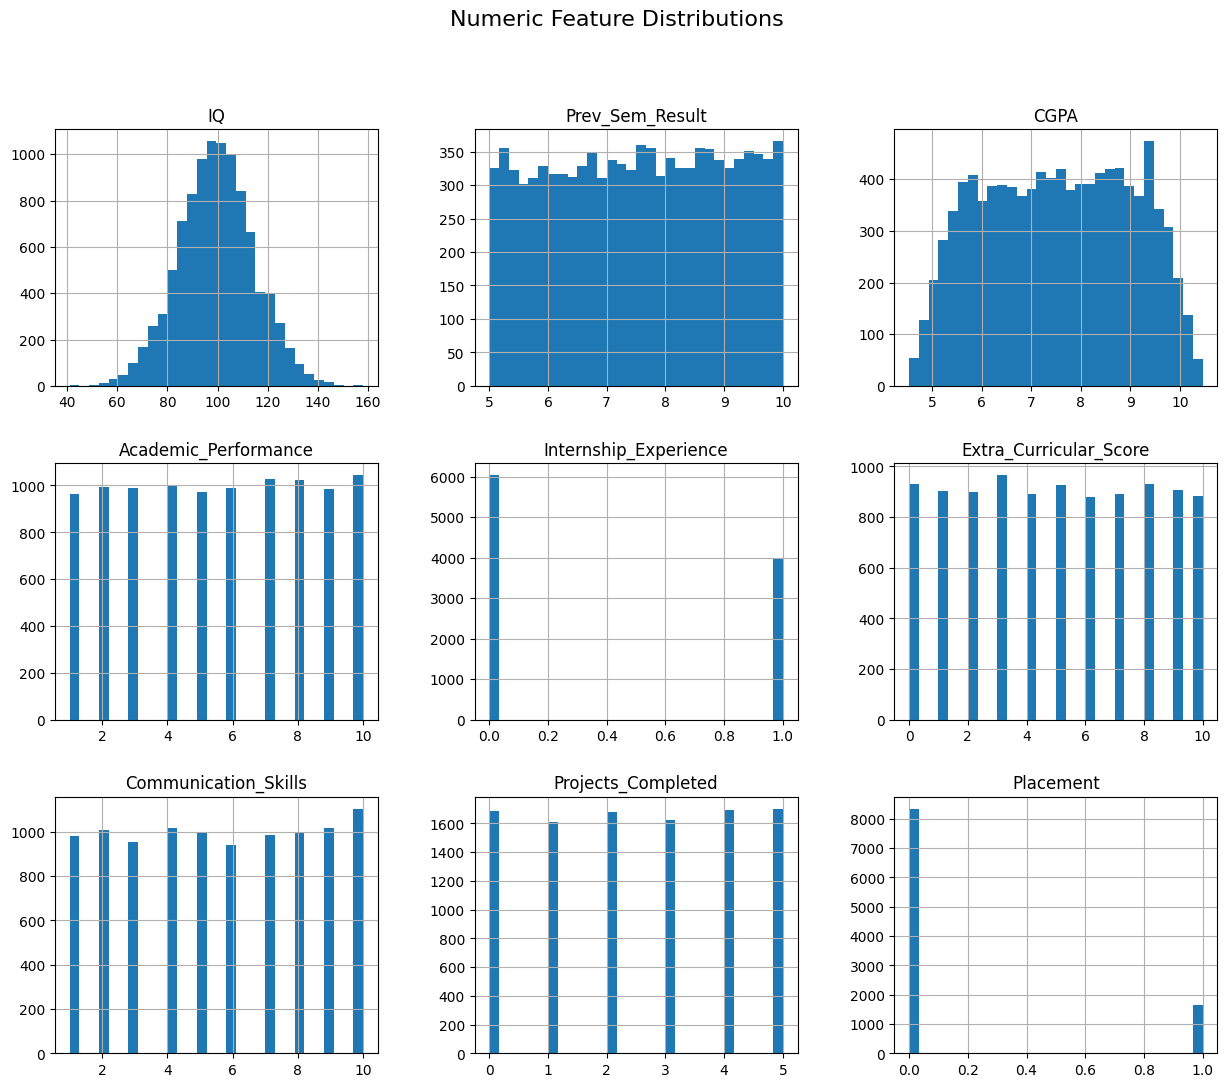

In [30]:
num_cols = df.select_dtypes(include=np.number).columns
df[num_cols].hist(figsize=(15,12), bins=30)
plt.suptitle("Numeric Feature Distributions", fontsize=16)
plt.show()

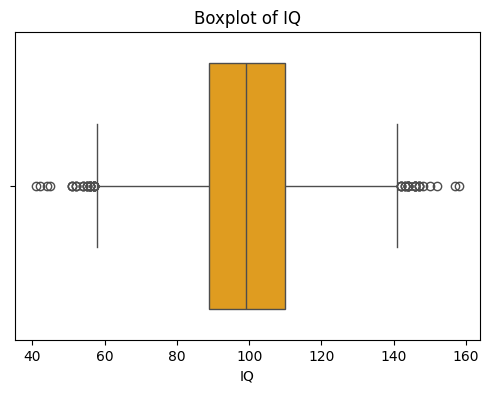

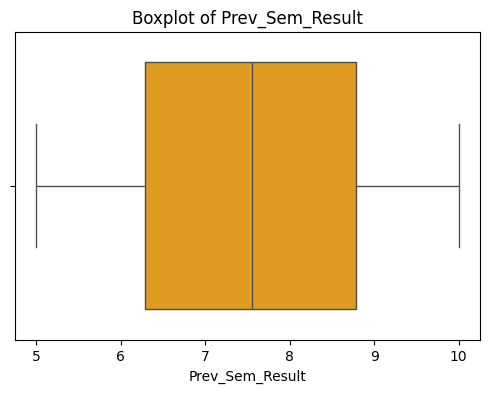

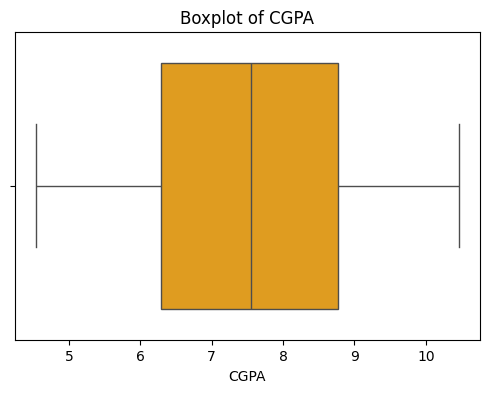

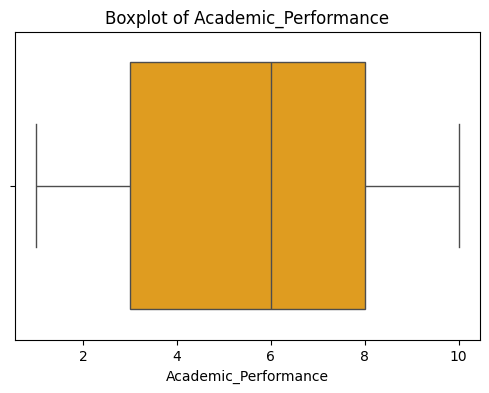

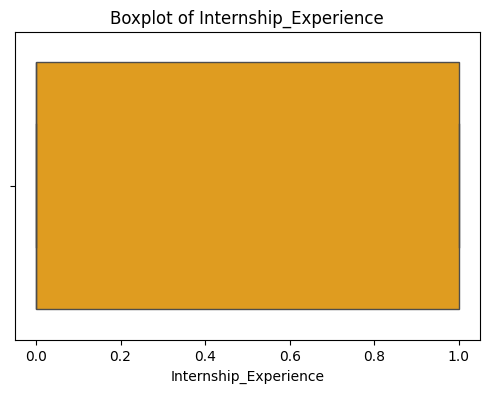

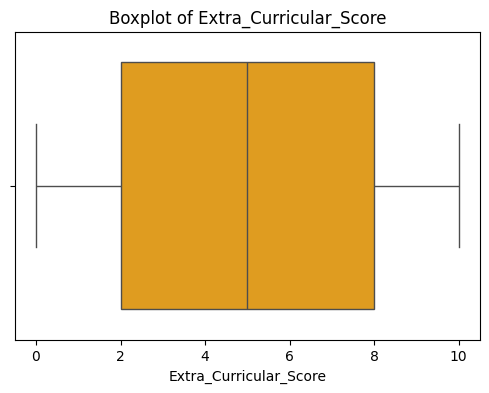

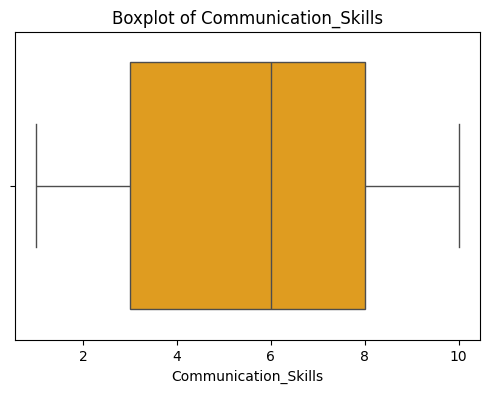

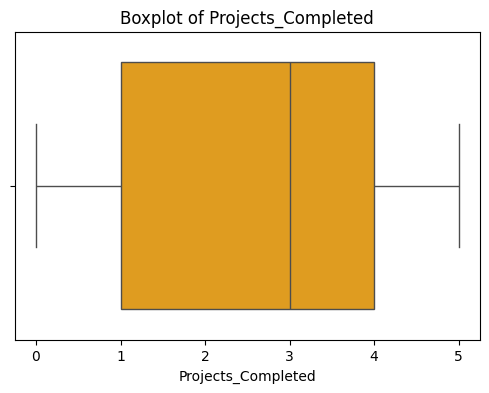

In [31]:
for col in [c for c in num_cols if c != 'Placement']:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df[col], color="orange")
    plt.title(f"Boxplot of {col}")
    plt.show()

In [34]:
x = df.drop(columns=['Placement'])
y = df['Placement']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [36]:

model=RandomForestClassifier()
model.fit(x_train,y_train)


importances = pd.Series(model.feature_importances_, index=x_train.columns)
print(importances.sort_values(ascending=False))

Communication_Skills      0.274585
IQ                        0.253299
Projects_Completed        0.174603
CGPA                      0.162667
Prev_Sem_Result           0.109755
Extra_Curricular_Score    0.011534
Academic_Performance      0.010694
Internship_Experience     0.002862
dtype: float64


In [37]:
df=df.drop(['Internship_Experience','Academic_Performance','Extra_Curricular_Score'],axis=1)
df.head()

,IQ,Prev_Sem_Result,CGPA,Communication_Skills,Projects_Completed,Placement
0,107,6.61,6.28,8,4,0
1,97,5.52,5.37,8,0,0
2,109,5.36,5.83,1,1,0
3,122,5.47,5.75,6,1,0
4,96,7.91,7.69,10,2,0


In [38]:
x = df.drop(columns=['Placement'])
y = df['Placement']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [41]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "AdaBoost": AdaBoostClassifier(random_state=42),
    "SVM": SVC(random_state=42),
    "Naive Bayes": GaussianNB(),
    "KNN": KNeighborsClassifier()
}

results = {}

for name, model in models.items():
    model.fit(x_train, y_train)
    y_p = model.predict(x_test)
    acc = accuracy_score(y_test, y_p) * 100
    results[name] = acc
    print(f"{name}: {acc:.2f}%")

Logistic Regression: 90.35%
Decision Tree: 100.00%
Random Forest: 100.00%
Gradient Boosting: 100.00%
AdaBoost: 100.00%
SVM: 88.55%
Naive Bayes: 90.70%
KNN: 97.70%


In [43]:
for name, model in models.items():
    scores = cross_val_score(model, x, y, cv=5)
    print(f"{name}: {scores.mean()*100:.2f}% ± {scores.std()*100:.2f}%")

Logistic Regression: 90.20% ± 0.30%
Decision Tree: 100.00% ± 0.00%
Random Forest: 99.98% ± 0.04%
Gradient Boosting: 100.00% ± 0.00%
AdaBoost: 100.00% ± 0.00%
SVM: 88.35% ± 0.25%
Naive Bayes: 90.28% ± 0.47%
KNN: 97.57% ± 0.12%


In [67]:
from sklearn.metrics import recall_score, f1_score, roc_auc_score, classification_report

print("Model Evaluation Metrics:")
for name, model in models.items():
    y_pred = model.predict(x_test)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    try:
        y_pred_proba = model.predict_proba(x_test)[:, 1]
        roc_auc = roc_auc_score(y_test, y_pred_proba)
    except AttributeError:
        roc_auc = "N/A" # Not all models have predict_proba

    print(f"\n{name}:")
    print(f"  Recall: {recall:.2f}")
    print(f"  F1-score: {f1:.2f}")
    print(f"  ROC AUC: {roc_auc}")

    # You can also print a detailed classification report
    # print(f"Classification Report for {name}:\n{classification_report(y_test, y_pred)}")

Model Evaluation Metrics:

Logistic Regression:
  Recall: 0.61
  F1-score: 0.67
  ROC AUC: 0.9440742939654477

Decision Tree:
  Recall: 1.00
  F1-score: 1.00
  ROC AUC: 1.0

Random Forest:
  Recall: 1.00
  F1-score: 1.00
  ROC AUC: 1.0

Gradient Boosting:
  Recall: 1.00
  F1-score: 1.00
  ROC AUC: 0.9999999999999999

AdaBoost:
  Recall: 1.00
  F1-score: 1.00
  ROC AUC: 1.0

SVM:
  Recall: 0.35
  F1-score: 0.50
  ROC AUC: N/A

Naive Bayes:
  Recall: 0.64
  F1-score: 0.69
  ROC AUC: 0.9300415594696221

KNN:
  Recall: 0.93
  F1-score: 0.93
  ROC AUC: 0.9958697070313932


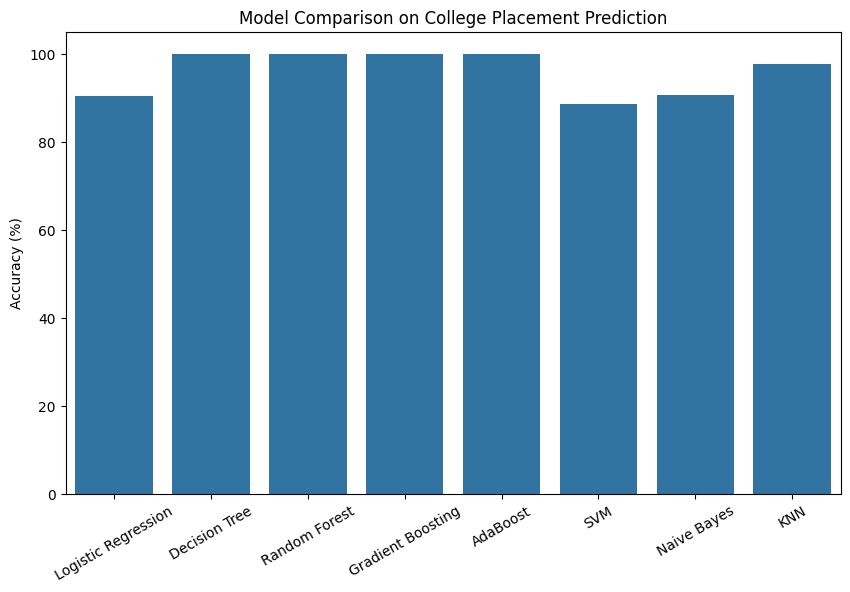

In [52]:
plt.figure(figsize=(10, 6))
sns.barplot(x=list(results.keys()), y=list(results.values()))
plt.xticks(rotation=30)
plt.ylabel("Accuracy (%)")
plt.title("Model Comparison on College Placement Prediction")
plt.show()

We can see signs of overfitting in decision tree, random forest, gradient boosting and Adaboost. So we'll go with KNN or Naive bayes

In [45]:

model=KNeighborsClassifier()
model.fit(x_train,y_train)

KNeighborsClassifier()

In [46]:
joblib.dump(model, 'CollegePlacement.pkl')

['CollegePlacement.pkl']

In [48]:
model=joblib.load('CollegePlacement.pkl')
predictions=model.predict(x_test)
score=accuracy_score(predictions,y_test)
print(f' Accuracy score.:{score}')

 Accuracy score.:0.977


In [66]:

new_input_data = (130,9.00,9.58,8,4)

new_cng_data = np.array(new_input_data)
new_input_data_reshaped = new_cng_data.reshape(1, -1)
new_input_df = pd.DataFrame(new_input_data_reshaped, columns=x_train.columns)

new_prediction = model.predict(new_input_df)
print(new_prediction)

if new_prediction[0] == 1:
  print('Placement Confirmed')
else:
  print('Did not get any Placement')

[1]
Placement Confirmed
